# Used Cars Price Predicition - Decision Tree Regressor

* Importing Libraries


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

To-Do : 

* Importing the Dataset

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# EDA

In [55]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [56]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


* Checking Dimention

In [57]:
df.ndim

2

* Checking Shape

In [58]:
df.shape

(4340, 8)

* Checking Columns

In [59]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

* Statistical Information

In [60]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


* Basic Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


* Unique values for fuel

In [62]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [63]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

* Unique values for seller

In [64]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

* Unique values for transmission

In [65]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

* Unique values for owner

In [66]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

* Adding a new column from fuel

In [67]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Feature Engineering

In [68]:
newdf=df.copy()

* Lable Encoding

* Manupulating the new_fuel values

Replace the values:
Petrol - 0
Diesel - 1
CNG - 2
LPG - 3
Electric - 4

In [69]:
x = newdf.fuel.replace({"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})

In [70]:
newdf.insert(newdf.columns.get_loc('fuel'),'new_fuel',x)

In [71]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [72]:
newdf.new_fuel.unique()

array([0, 1, 2, 3, 4], dtype=int64)

* Creating a column new_seller_type and place it at index of the seller_type column


 Replace the values:
 Individual - 0
 Dealer - 1
 Trustmark Dealer - 2


In [73]:
y=newdf.seller_type.replace({"Individual":0,'Dealer':1,"Trustmark Dealer":2})

In [74]:
newdf.insert(newdf.columns.get_loc("seller_type"),'new_seller_type',y)

In [75]:
newdf.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


* Featuring Transmission

In [76]:
z=LabelEncoder().fit_transform(newdf.transmission)
newdf.insert(newdf.columns.get_loc('transmission'),'new_transmission',z)

In [77]:
newdf.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,new_transmission,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,1,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,1,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,1,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,1,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,1,Manual,Second Owner


* One Hot Encoder

In [78]:
enc=OneHotEncoder()


In [79]:
enc_df=pd.DataFrame(enc.fit_transform(newdf[['seller_type']]).toarray())

In [80]:
enc_df.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [81]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [82]:
df['fuel']=LabelEncoder().fit_transform(df['fuel'])
df['seller_type']=LabelEncoder().fit_transform(df['seller_type'])
df['transmission']=LabelEncoder().fit_transform(df['transmission'])
df['owner']=LabelEncoder().fit_transform(df['owner'])

In [83]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


* Age of the car

In [84]:
present_Year=2022


In [85]:
df['age']=present_Year-df['year']

In [86]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,10
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,8


* Cleaning Dataset

In [87]:
df.drop(['name','year'],axis=1,inplace=True)

* Renaming the selling price column

In [88]:
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [89]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8


* Features correlation

In [90]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,age
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
age,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


* Correlation Heatmap

<AxesSubplot:>

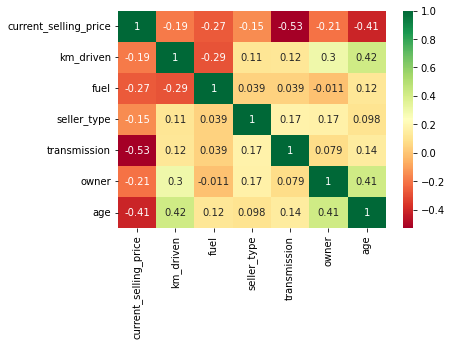

In [115]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

* Feature pairplot

<Figure size 3600x3600 with 0 Axes>

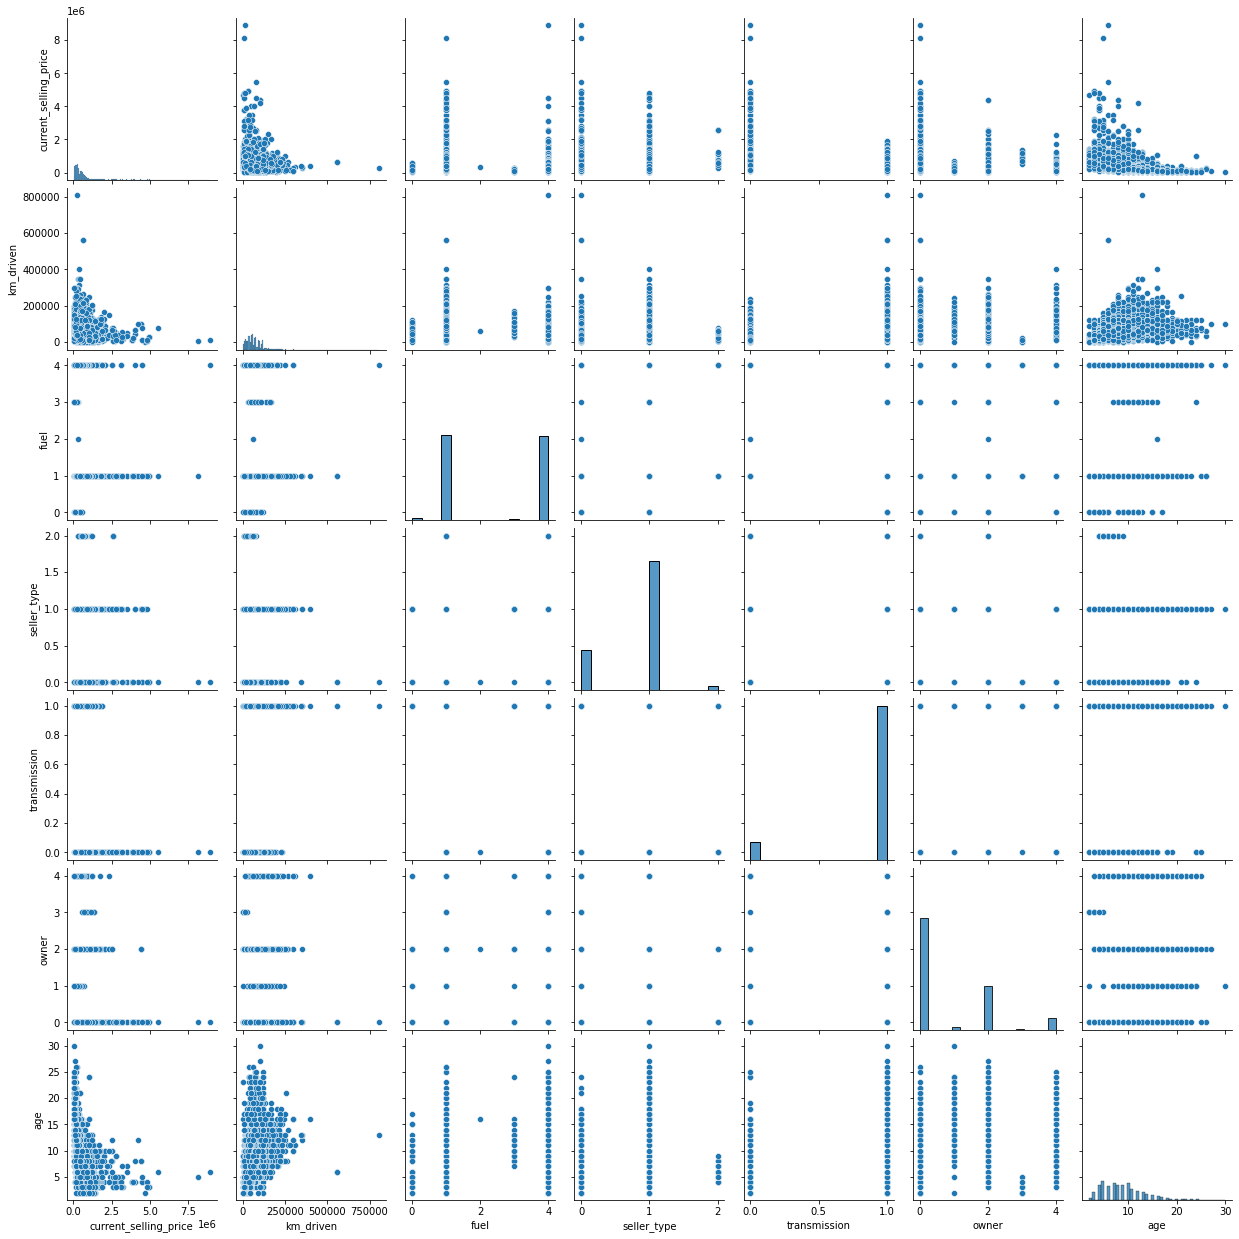

In [92]:
plt.figure(figsize=(50,50))
sns.pairplot(df)

* Boxplot

<AxesSubplot:>

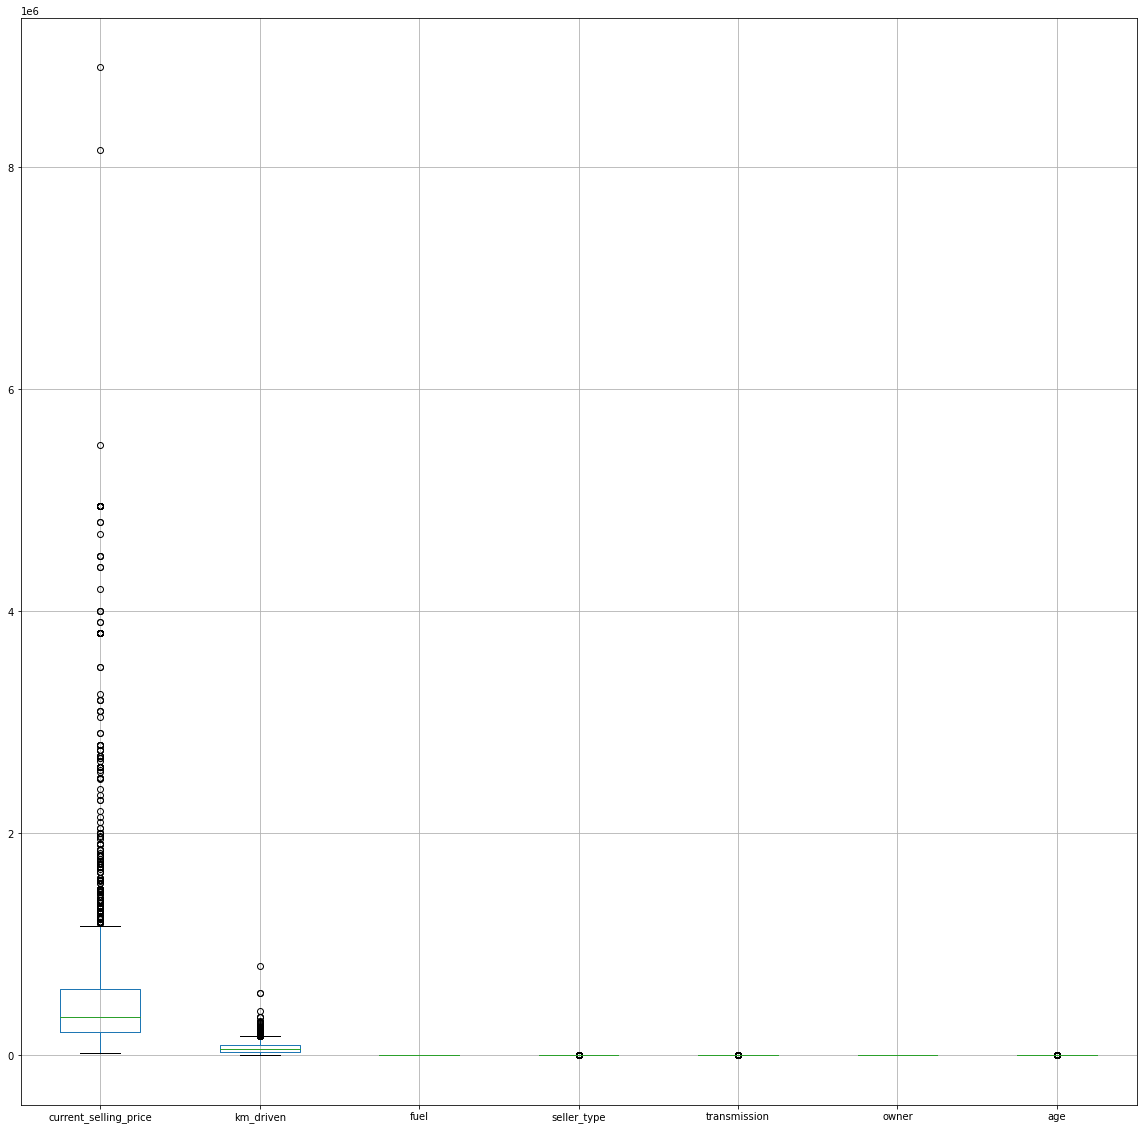

In [93]:
plt.figure(figsize=(20,20))
df.boxplot()

# Machine Learning

* Variablizing the data

In [94]:
df.head(1)

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,4,1,1,0,15


In [95]:
x=np.array(df.drop('current_selling_price',axis=1))
y=np.array(df.current_selling_price)

* Splitting the data

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

* Model Selection

In [97]:
model=DecisionTreeRegressor()

* Fitting the model

In [98]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

* Predicting the target

In [99]:
y_pred=model.predict(x_test)

* Checking the Predicted values

In [100]:
look=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})

In [101]:
look

,Actual,Predicted
0,2600000,2600000.0
1,1770000,800000.0
2,140000,229999.0
3,2595000,2600000.0
4,1100000,660000.0
...,...,...
863,950000,450000.0
864,55000,409999.0
865,600000,316250.0
866,250000,700000.0


* Plotting the checking values


Text(0.5, 1.0, 'Actual Values v/s Predicted Values')

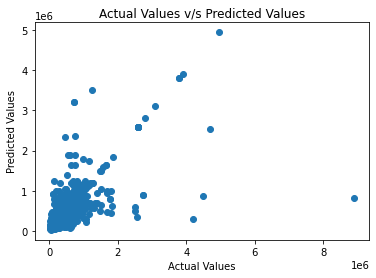

In [102]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values v/s Predicted Values")

* Checking the plot with the x_test

In [103]:
# from turtle import color


# plt.scatter(x_test,y_test,color='red')
# plt.scatter(x_test,y_pred,color='Greens')
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual Values v/s Predicted Values")

In [104]:
x_test.shape

(868, 6)

In [105]:
y_test.shape

(868,)

In [106]:
y_pred.shape

(868,)

Doesn't Actually work as the Number of features will vary

* Correlation with the predicted values

<AxesSubplot:>

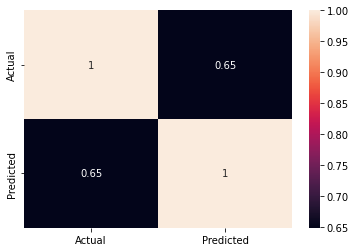

In [107]:
sns.heatmap(look.corr(),annot=True)

# Performance Testing

* Accuracy Score

In [108]:
model.score(x_test,y_test)

0.3946434911910287

* R squared

In [109]:
r2_score(y_test,y_pred)

0.3946434911910287

* MSE

In [110]:
mean_squared_error(y_test,y_pred)

225440187448.0452

* MAE

In [111]:
mean_absolute_error(y_test,y_pred)

193479.13007942517

# Random Forest Regressor

* Variablizing the data

In [121]:
a=df.drop('current_selling_price',axis=1)
b=df.current_selling_price

In [112]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8


# Feature Selection (Feature Importance)

* Model Selection

In [118]:
model_feat=ExtraTreesRegressor()

* Fitting the Model

In [122]:
feat_imp=model.fit(a,b)

* Getting values for important features

In [123]:
feat_imp.feature_importances_

array([0.31986696, 0.12592955, 0.05797189, 0.29282666, 0.01552668,
       0.18787826])

* Plotting the important Features

<AxesSubplot:>

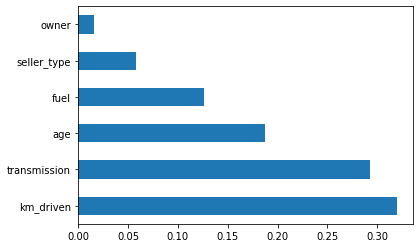

In [126]:
imp=pd.Series(feat_imp.feature_importances_,index=a.columns)
imp.nlargest(7).plot(kind='barh')

* Splitting the data

In [127]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=1)

# Hyper Parameter Tuning

In [132]:
n_estimators=[int(i) for i in np.linspace(start=100, stop=1200,num=12)]

max_features=['auto','sqrt']

max_depth=[int(i) for i in np.linspace(start=5, stop=30,num=6)]

min_samples_split=[2,5,10,1]

min_sample_leaf=[1,2,5,10]

In [134]:
random_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_sample_leaf":min_sample_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 1],
 'min_sample_leaf': [1, 2, 5, 10]}

* Model Selection

In [128]:
rfg=RandomForestRegressor()